##Assesment

#Assignment 1: Submit a write-up on the following:

- Hugging face agents

- Hugging face pipeline for text generation

- HF inference endpoints

- Give feedback on the image generation and explore different models available on the Hugging Face website



#Assignment 2: Using OpenAI's CLIP Model for Image Captioning and Building an Image Search Engine

#Objective

##In this assignment, you will use OpenAI's CLIP (Contrastive Language-Image Pre-training) model to:
- Generate captions for 15 different images.
- Build a search engine for these images using a larger dataset of images.


##Part 1: Generate Captions for Images

##Part 2: Build an Image Search Engine


##Submission
Submit the following as a **Streamlit** app:

- Your Python code for generating captions and building the search engine.
- A report describing your approach, challenges faced, and how you overcame them.
- Screenshots of the interface and results.

Evaluation Criteria

- Correctness and efficiency of the code.
- Clarity and completeness of the report.
- Usability and functionality of the search engine interface.

#Please don't use any Generative AI Models

In [3]:
from transformers import CLIPProcessor, CLIPModel, BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import requests
import matplotlib.pyplot as plt
import torch

In [1]:
sentences = [
    "it caught him off guard that space smelled of seared steak",
    "she could not decide between painting her teeth or brushing her nails",
    "he thought there'd be sufficient time is he hid his watch",
    "the bees decided to have a mutiny against their queen",
    "the sign said there was road work ahead so she decided to speed up",
    "on a scale of one to ten, what's your favorite flavor of color?",
    "flying stinging insects rebelled in opposition to the matriarch"
]

In [2]:
long_text = ["""
Comparing the cosine similarity scores, we see that by introducing the word "elephant" instead of "mouse" in Sentence 2, the cosine similarity score increased from approximately 0.856 (without noise) to approximately 0.898 (with noise).
This demonstrates how noise can affect the similarity measurement between sentences.
"""]

In [5]:
# Load CLIP model (for images and text together)
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Load BLIP model (for creating captions)
blip_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
blip_processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [7]:
def get_image_from_url(url):

    try:
        response = requests.get(url)
        image = Image.open(requests.get(url, stream=True).raw)
        return image
    except:
        print("can not load image from:", url)
        return None

def create_caption(image):

    inputs = blip_processor(image, return_tensors="pt")

    output = blip_model.generate(**inputs, max_length=50)

    caption = blip_processor.decode(output[0], skip_special_tokens=True)

    return caption

def find_best_caption(image, possible_captions):

    inputs = clip_processor(text=possible_captions, images=image,
                           return_tensors="pt", padding=True)

    outputs = clip_model(**inputs)

    probs = outputs.logits_per_image.softmax(dim=1)
    best_match = probs.argmax().item()
    confidence = probs[0][best_match].item()

    return possible_captions[best_match], confidence

#### test the first image

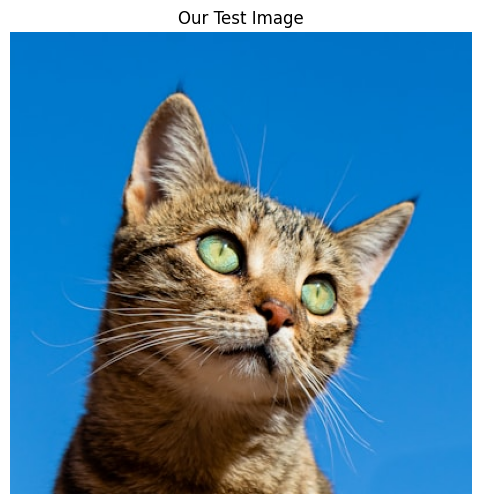


Creating caption: 
Auto Caption: a cat with green eyes looking up at the sky

Testing with multiple captions:
Best Match: a cute cat sitting indoors
Confidence: 0.98


In [8]:
test_image_url = "https://images.unsplash.com/photo-1574158622682-e40e69881006?w=400"

test_image = get_image_from_url(test_image_url)

if test_image:

    plt.figure(figsize=(6, 6))
    plt.imshow(test_image)
    plt.title("Our Test Image")
    plt.axis('off')
    plt.show()

    print("\nCreating caption: ")
    auto_caption = create_caption(test_image)
    print(f"Auto Caption: {auto_caption}")

    print("\nTesting with multiple captions:")
    possible_captions = [
        "a cute cat sitting indoors",
        "a dog playing outside",
        "a car on the road",
        "a beautiful landscape",
        "food on a plate"
    ]

    best_caption, confidence = find_best_caption(test_image, possible_captions)
    print(f"Best Match: {best_caption}")
    print(f"Confidence: {confidence:.2f}")

else:
    print(" can not't load the test image.")

In [19]:
# List of 15 images
image_urls = [
    "https://images.unsplash.com/photo-1506905925346-21bda4d32df4?w=400",
    "https://images.unsplash.com/photo-1551698618-1dfe5d97d256?w=400",
    "https://images.unsplash.com/photo-1574158622682-e40e69881006?w=400",
    "https://images.unsplash.com/photo-1552053831-71594a27632d?w=400",
    "https://images.unsplash.com/photo-1441974231531-c6227db76b6e?w=400",
    "https://images.unsplash.com/photo-1449824913935-59a10b8d2000?w=400",
    "https://images.unsplash.com/photo-1502945015378-0e284ca1a5be?w=400",
    "https://images.unsplash.com/photo-1518837695005-2083093ee35b?w=400",
    "https://images.pexels.com/photos/236047/pexels-photo-236047.jpeg?cs=srgb&dl=clouds-cloudy-countryside-236047.jpg&fm=jpg",
    "https://images.unsplash.com/photo-1501594907352-04cda38ebc29?w=400",
    "https://images.unsplash.com/photo-1472214103451-9374bd1c798e?w=400",
    "https://i0.wp.com/picjumbo.com/wp-content/uploads/beautiful-nature-scenery-free-photo.jpg?w=2210&quality=70",
    "https://tse3.mm.bing.net/th/id/OIP.evpbjk6IKFP_J0MCjgfXvQHaEO?r=0&pid=ImgDet&w=474&h=270&rs=1&o=7&rm=3",
    "https://images.unsplash.com/photo-1470071459604-3b5ec3a7fe05?w=400",
    "https://tse3.mm.bing.net/th/id/OIP.A6xogJhXgke9BDNKuk6THgHaEO?r=0&pid=ImgDet&w=474&h=270&rs=1&o=7&rm=3"
]


caption_options = [
    "beautiful mountain landscape",
    "modern city with tall buildings",
    "cute cat sitting",
    "friendly dog",
    "green forest with trees",
    "delicious food",
    "red sports car",
    "blue ocean water",
    "tall building",
    "colorful bird",
    "pretty flowers",
    "modern technology",
    "happy person",
    "snowy winter scene",
    "peaceful nature"
]

In [20]:
all_image_data = []

for i, url in enumerate(image_urls):
    print(f"\nimage {i+1}/15")

    image = get_image_from_url(url)

    if image:
        auto_caption = create_caption(image)

        best_caption, confidence = find_best_caption(image, caption_options)

        image_info = {
            'number': i + 1,
            'url': url,
            'image': image,
            'auto_caption': auto_caption,
            'best_caption': best_caption,
            'confidence': confidence
        }

        all_image_data.append(image_info)

        print(f"Auto Caption: {auto_caption}")
        print(f"Best Match: {best_caption} (confidence: {confidence:.2f})")
    else:
        print(f"can not load image {i+1}")


image 1/15
Auto Caption: the sun sets over the mountains and clouds
Best Match: beautiful mountain landscape (confidence: 0.97)

image 2/15
Auto Caption: a person skiing down a snowy hill
Best Match: snowy winter scene (confidence: 0.45)

image 3/15
Auto Caption: a cat with green eyes looking up at the sky
Best Match: cute cat sitting (confidence: 0.98)

image 4/15
Auto Caption: a puppy with a stick in its mouth
Best Match: friendly dog (confidence: 0.88)

image 5/15
Auto Caption: a forest with a path through it
Best Match: green forest with trees (confidence: 0.92)

image 6/15
Auto Caption: a city street with cars and people walking
Best Match: modern city with tall buildings (confidence: 0.95)

image 7/15
Auto Caption: a laptop on a desk with a plant in the background
Best Match: modern technology (confidence: 0.60)

image 8/15
Auto Caption: a close up of the ocean waves
Best Match: blue ocean water (confidence: 0.99)

image 9/15
Auto Caption: a field with a tree in the middle
Best 

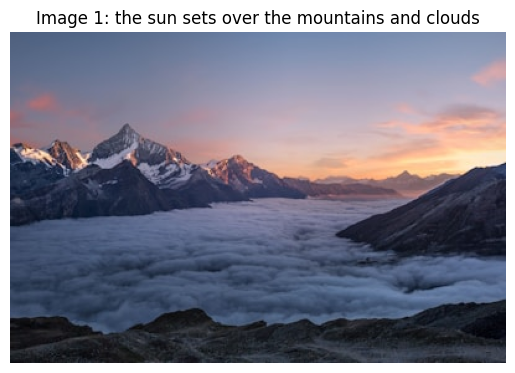

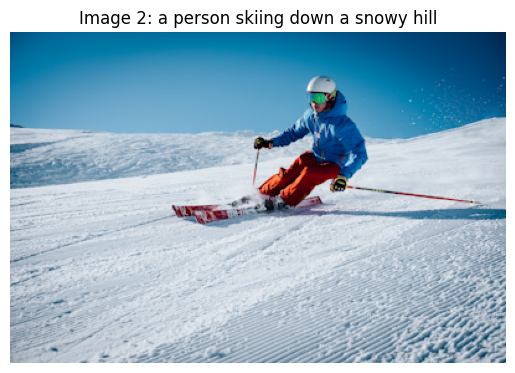

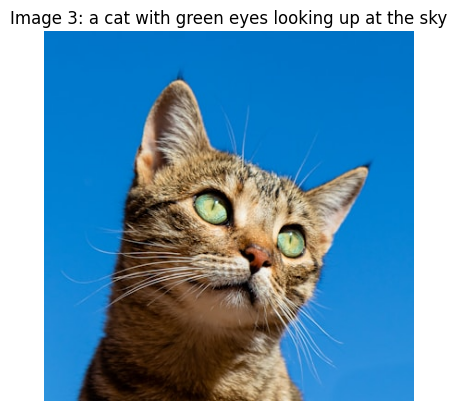

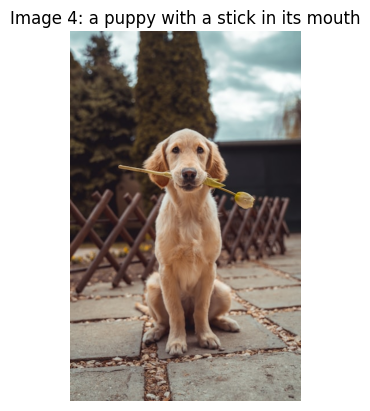

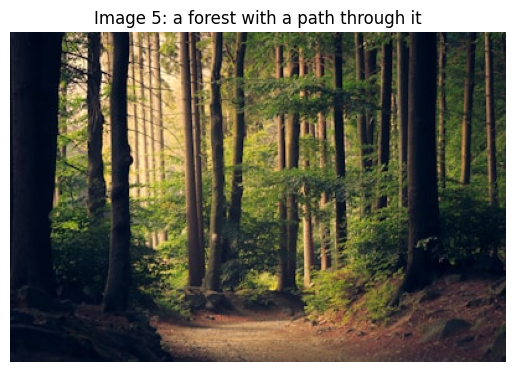

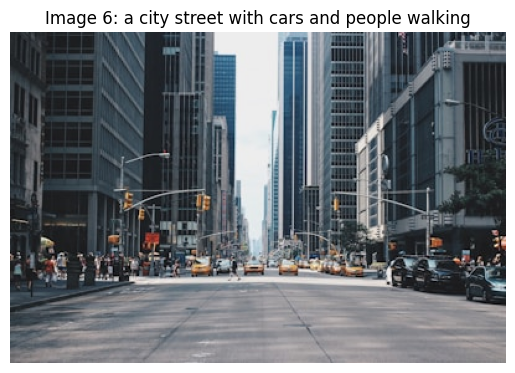

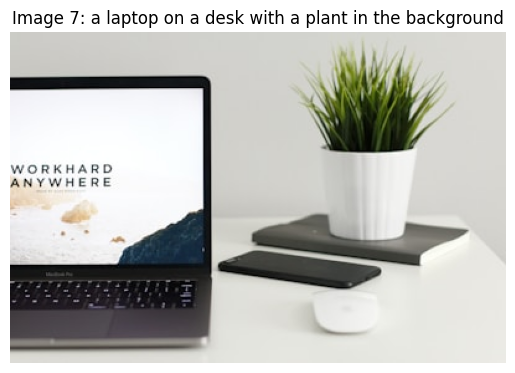

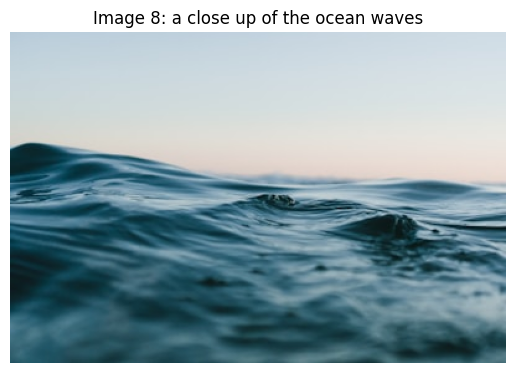

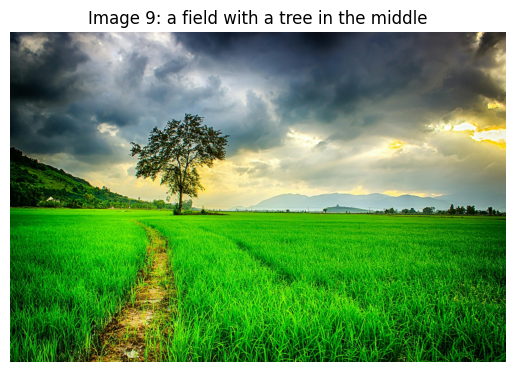

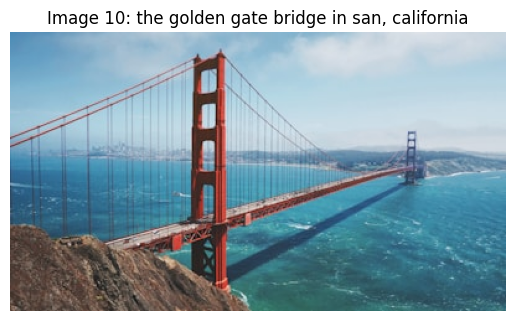

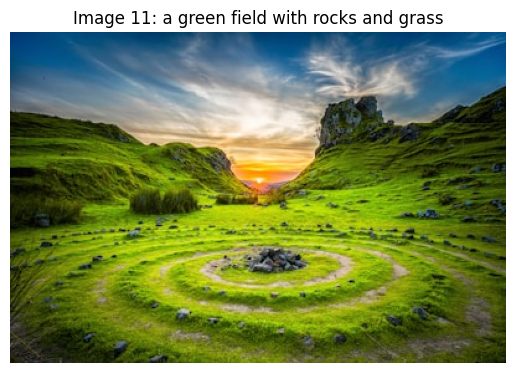

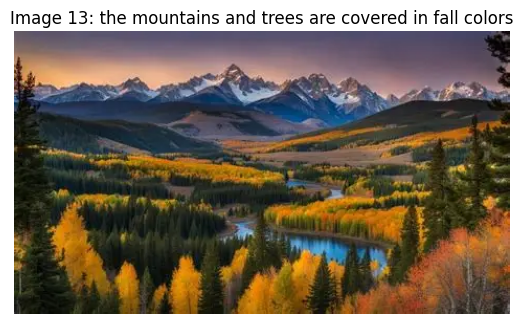

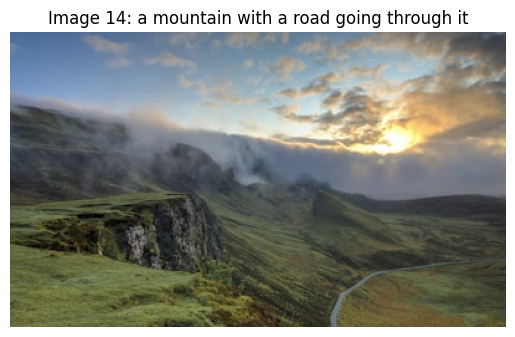

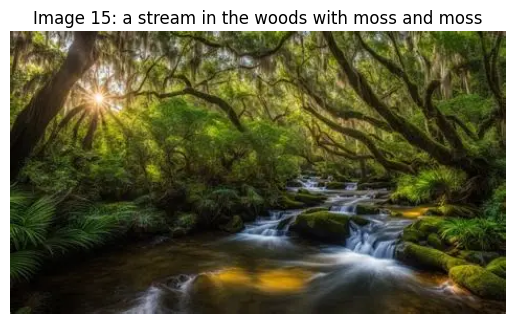

In [21]:
for data in all_image_data:
    plt.figure()
    plt.imshow(data['image'])
    plt.title(f"Image {data['number']}: {data['auto_caption']}")
    plt.axis('off')
    plt.show()

#### Search Engine for Image Captioning


Searching for: cat


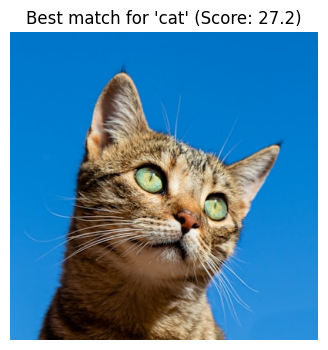

Found: a cat with green eyes looking up at the sky


Searching for: mountain


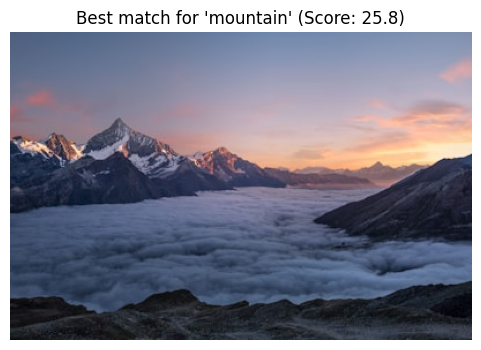

Found: the sun sets over the mountains and clouds


Searching for: city


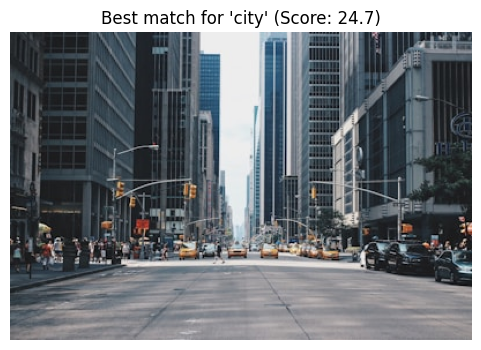

Found: a city street with cars and people walking


Searching for: nature


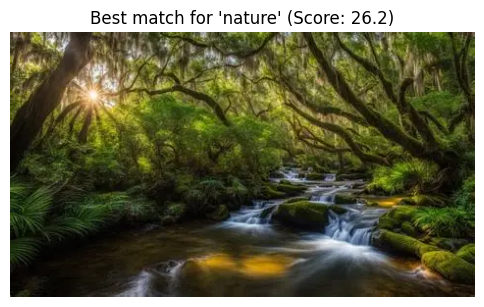

Found: a stream in the woods with moss and moss


Searching for: animal


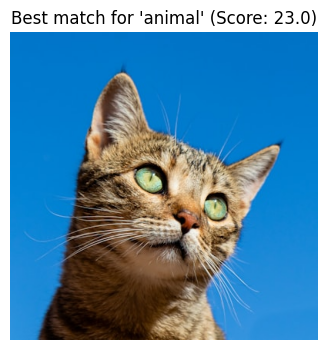

Found: a cat with green eyes looking up at the sky



In [22]:
search_list = ["cat", "mountain", "city", "nature", "animal"]

for search_word in search_list:
    print(f"\nSearching for: {search_word}")

    best_score = 0
    best_image = None

    for data in all_image_data:

        inputs = clip_processor(text=[search_word], images=data['image'], return_tensors="pt")
        result = clip_model(**inputs)
        score = result.logits_per_image[0].item()

        if score > best_score:
            best_score = score
            best_image = data

    if best_image:
        plt.figure(figsize=(6, 4))
        plt.imshow(best_image['image'])
        plt.title(f"Best match for '{search_word}' (Score: {best_score:.1f})")
        plt.axis('off')
        plt.show()

        print(f"Found: {best_image['auto_caption']}")

    print()